In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1.
Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы.

### 1.1. Скачать следующие данные: kc-house-data.

In [192]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Изучите стоимости недвижимости.

In [120]:
p_houses = df['price'].value_counts()
prices = p_houses.index
counts = p_houses.values

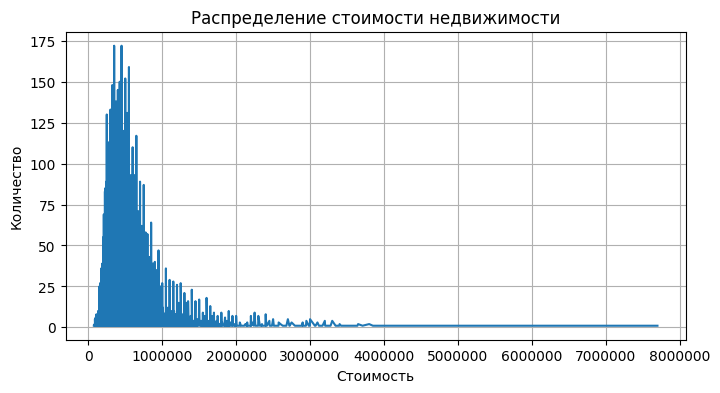

In [123]:
plt.figure(figsize=[8,4])
sns.lineplot(x = prices, y = counts)
plt.grid()
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.title('Распределение стоимости недвижимости');
plt.ticklabel_format(axis='x', style='', scilimits=(-5,7))

Вывод: стоимость большей части домов менее 1000000 ед.

### 1.3 Изучите распределение квадратуры жилой площади.

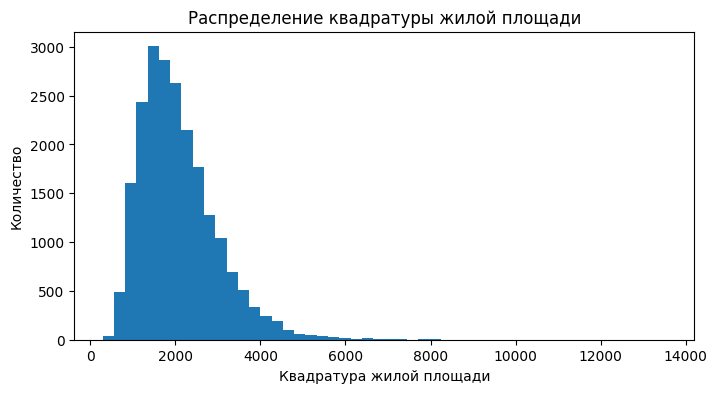

In [124]:
plt.figure(figsize=[8,4])
plt.hist(df['sqft_living'], bins=50)
plt.xlabel('Квадратура жилой площади')
plt.ylabel('Количество')
plt.title('Распределение квадратуры жилой площади');

Вывод: большая часть домов имеет квадратуру жилой площади около 2000ед.

### 1.4. Изучите распределение года постройки

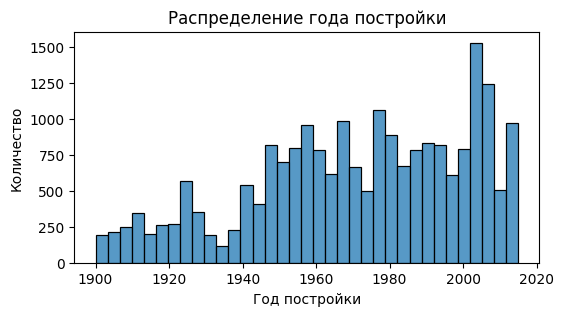

In [11]:
plt.figure(figsize=[6, 3])
sns.histplot(df['yr_built'])
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.title('Распределение года постройки');

Вывод: основная часть домов построена в период с 1940 по 2020, в период с 2000 по 2010 наблюдался подъем строительства.

## Задача 2.

### 2.1. Изучите распределение домов от наличия вида на набережную.

In [98]:
waterfr = df['waterfront'].value_counts()
w_values = waterfr.values
w_labels = ['Без вида на набережную', 'С видом на набережную']

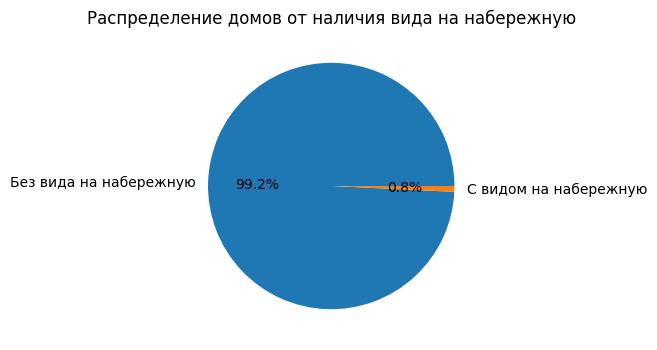

In [95]:
plt.figure(figsize=[4, 4])
plt.pie(w_values, labels=w_labels, autopct='%1.1f%%')
plt.title('Распределение домов от наличия вида на набережную');

Вывод: домов с видом на набережную крайне мало.

### 2.2. Изучите распределение этажей домов.

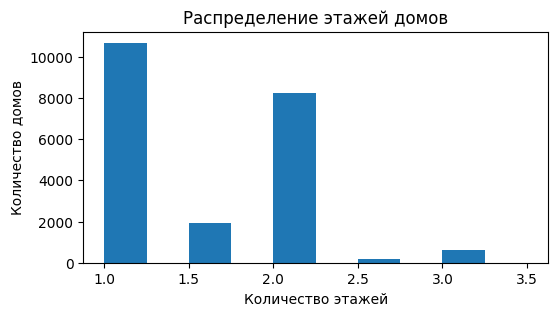

In [30]:
plt.figure(figsize=[6, 3])
plt.hist(df['floors'])
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.title('Распределение этажей домов');

Вывод: преобладают одно- и двухэтажные постройки.

### 2.3. Изучите распределение состояния домов

In [186]:
h_grades = df['condition'].value_counts()
gr_values = h_grades.values
gr_labels = h_grades.index

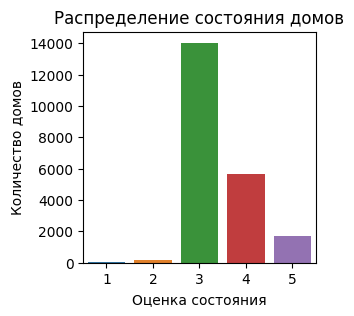

In [187]:
plt.figure(figsize=[3, 3])
sns.barplot(x=gr_labels, y=gr_values)
plt.xlabel('Оценка состояния')
plt.ylabel('Количество домов')
plt.title('Распределение состояния домов');

Вывод: состояние большей части домов среднее

## Задача 3. 
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями

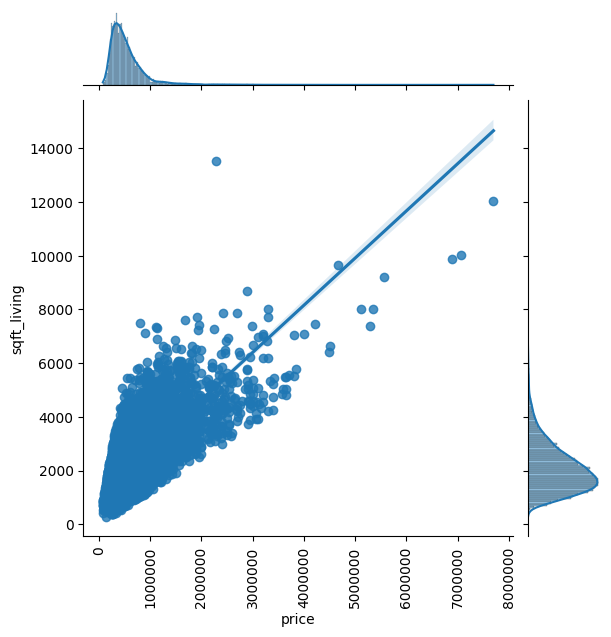

In [157]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.xticks(rotation=90)
plt.ticklabel_format(axis='both', style='', scilimits=(-5,7));

Вывод: наблюдается прямая линейная зависимость цены от жилой площади: чем больше жилая площадь, тем выше стоимость дома.

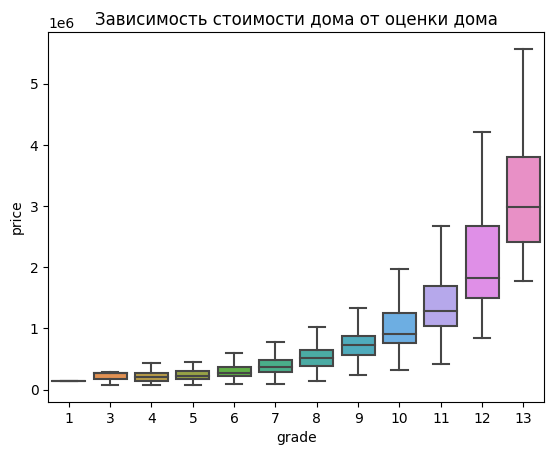

In [189]:
sns.boxplot(x=df['grade'], y=df['price'], showfliers=False)
plt.title('Зависимость стоимости дома от оценки дома');

Вывод: чем лучше состояние дома, тем выше его цена.

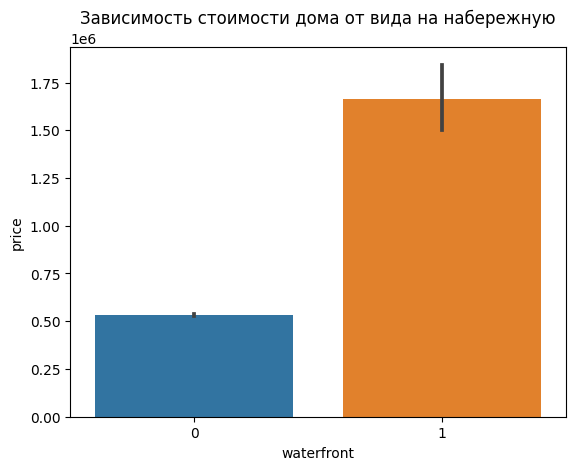

In [182]:
sns.barplot(x=df['waterfront'], y=df['price'])
plt.title('Зависимость стоимости дома от вида на набережную');

Вывод: дома с видом на набережную стоят дороже домов с видом не на набережную.